# 1 PERKENALAN

= ================================================

Graded Challenge 6<br>
Nama  : Muhammad Jabaris Maulana<br>
Batch : HCK-024<br>
Program ini dibuat untuk melakukan segmentasi terhadap data user kartu kredit dalam kepentingan membaca perilaku setiap segmennya untuk memberikan rekomendasi terhadap tim marketing.

= ================================================

# 2 QUERY SQL

>Query SQL dilakukan pada Google Big Query SQL Tool, hasilnya diunduh dengan format csv.<br>
Query dilakukan menggunakan script berikut:

``` sql
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_024_hck.credit-card-information`
WHERE MOD (CUST_ID,2) = 0
ORDER BY CUST_ID
```

# 3 IMPORT LIBRARY

In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

import pickle
import json

import warnings
warnings.filterwarnings('ignore') #turn off warning

# 4 DATA LOADING

In [4]:
# muat data dan buat menjadi dataframe
df = pd.read_csv('P1G6_Set_1_alan.csv')

In [5]:
# tampilkan 10 baris awal
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2,4613.570499,1.000000,0.00,0.00,0.00,1728.341939,0.000000,0.000000,0.000000,0.090909,1,0,6000.0,922.218961,1460.635220,0.000000,11
1,4,2583.247881,1.000000,1337.35,45.65,1291.70,2484.594650,1.000000,0.083333,1.000000,0.500000,18,21,3000.0,819.792196,6404.855484,0.000000,12
2,6,1597.911395,1.000000,0.00,0.00,0.00,162.919727,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,548.420841,416.956325,0.000000,12
3,8,3506.489102,1.000000,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.000000,6
4,10,2306.310095,1.000000,359.96,0.00,359.96,2843.482435,0.916667,0.000000,0.916667,0.333333,6,11,4000.0,1482.816136,2056.434829,0.000000,12
5,12,101.682988,1.000000,610.34,86.00,524.34,0.000000,1.000000,0.166667,1.000000,0.000000,0,40,1500.0,324.924223,152.877812,0.090909,12
6,14,3215.903805,1.000000,745.48,0.00,745.48,0.000000,1.000000,0.000000,1.000000,0.000000,0,35,2500.0,0.000000,NaN,0.000000,12
7,16,966.251742,1.000000,311.45,311.45,0.00,955.959749,0.333333,0.333333,0.000000,0.083333,1,15,1500.0,277.522439,286.299328,0.000000,12
8,18,2306.698723,0.727273,12784.51,11246.07,1538.44,191.652876,0.666667,0.666667,0.333333,0.083333,1,68,6200.0,13705.004410,1310.291574,0.000000,12
9,20,2610.433432,1.000000,512.50,0.00,512.50,2771.850961,1.000000,0.000000,0.857143,0.142857,6,11,3000.0,691.600531,741.985756,0.000000,7


In [6]:
# tampilkan 10 baris akhir
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,8932,1133.652007,1.000000,34.83,34.83,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,1200.0,309.340005,279.044103,0.000000,12
4466,8934,10.160744,0.636364,82.04,0.00,82.04,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,2000.0,139.914571,153.668941,0.000000,12
4467,8936,1368.995070,1.000000,521.31,140.00,381.31,0.000000,1.000000,0.083333,1.000000,0.000000,0,20,3000.0,616.095965,467.239217,0.000000,12
4468,8938,202.080470,1.000000,190.96,0.00,190.96,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,1000.0,156.408373,173.016455,0.083333,12
4469,8940,80.363442,0.909091,2370.44,47.50,2322.94,0.000000,1.000000,0.083333,1.000000,0.000000,0,63,1500.0,2373.359220,141.350236,0.818182,12
4470,8942,83.477053,0.181818,0.00,0.00,0.00,2654.856157,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,12902.188130,1791.729021,0.500000,12
4471,8944,8.404256,0.857143,0.00,0.00,0.00,132.266653,0.000000,0.000000,0.000000,0.285714,3,0,2500.0,206.851966,24.421074,0.250000,7
4472,8946,4211.539631,1.000000,0.00,0.00,0.00,455.581546,0.000000,0.000000,0.000000,0.083333,1,0,10500.0,1288.287239,1164.178674,0.000000,12
4473,8948,111.539712,1.000000,1364.86,0.00,1364.86,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,4000.0,1500.447193,150.868096,0.200000,12
4474,8950,294.280019,1.000000,19.90,19.90,0.00,75.255164,0.083333,0.083333,0.000000,0.166667,2,1,1000.0,214.638861,174.577973,0.000000,12


# 5 EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
# tampilkan info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

>Dapat diamati terdapat beberapa missing value pada beberapa kolom. Keseluruhan data memiliki nilai numerik (continous dan discrete) kecuali `CUST_ID` yang merupakan nilai nominal.

In [8]:
# cek nama kolom untuk memastikan tidak ada whitespace
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## PROBLEM 1

>Apakah terdapat pola antara pengaruh TENURE dengan variabel `PURCHASES`, `BALANCE`, dan `PAYMENTS` ? Buatlah visualisasi yang menunjukkan hubungan ini berikan rekomendasi bisnis untuk tim marketing mengenai hal ini.

In [9]:
# buat dataframe berisi variabel yang ingin divisualisasikan
df_EDA1 = df[['TENURE','PURCHASES','BALANCE','PAYMENTS']]

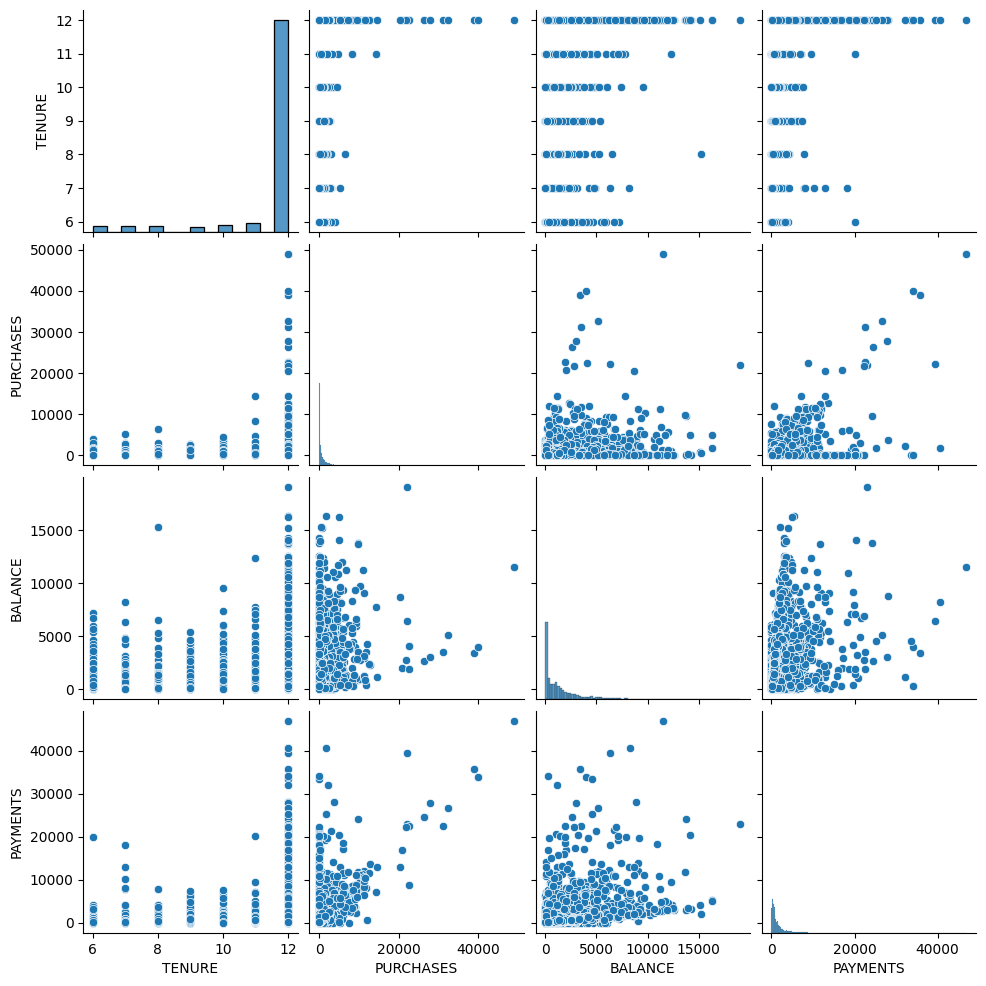

In [10]:
# buat pairplot untuk menghemat energi pikiran
sns.pairplot(df_EDA1)

### Analisis

> Berdasarkan hasil visualisasi, dapat dilihat bahwa `TENURE` memiliki pengaruh terhadap `PURCHASES`, `BALANCE` dan `PAYMENTS` yaitu:<br>
- Secara umum semakin tinggi `TENURE` semakin tinggi juga nilai variansi `PURCHASES`, `BALANCE` dan `PAYMENTS`.
- Jika diteliti lebih rinci, pola `TENURE` terhadap ketiga variabel lainnya membentuk variansi seperti huruf U.
- Nilai `TENURE` yang kecil (25% awal, sayap kiri) memiliki nilai variansi lainnya yang lebih tinggi dan cenderung turun seiring bertambahnya nilai `Tenure` sampai ke nilai tengah sebagai titik terendah (sekitar area median tenure).
- Setelah melewati nilai tengah dari `Tenure`, nilai variansi variabel lainnya akan mengalami kenaikan yang relatif sangat tinggi sampai ke arah nilai max dari `TENURE`.

> Dari hasil pengamatan visualisasi terlihat variabel seperti ada 3 kelompok yaitu:
1. Tenure Rendah dengan nilai variansi variabel variabel lainnya menengah-rendah.
2. Tenure Sedang dengan nilai variansi variabel lainnya rendah.
3. Tenure Tinggi dengan nilai variansi variabel sangat tinggi.

### Rekomendasi

> Berdasarkan hasil analisis, saya dapat memberikan beberapa rekomendasi untuk meningkatkan nilai `PURCHASES` yang otomatis juga akan menaikkan nilai `BALANCE` dan `PAYMENTS`:
1. Berikan promosi kepada pilihan installment tenure rendah dan sedang agar banyak user baru tertarik untuk melakukan transaksi dengan metode installment.
2. Untuk menerapkan rekomendasi nomor 1, agar tidak mengganggu jumlah user dengan tenure tinggi yang berpindah ke tenure rendah atau sedang maka berikan promo juga terhadap tenure tinggi dengan setidaknya nilai promo yang lebih kecil. Ini dilakukan untuk mencegah menurunnya revenue perusahaan karena tenure tinggi menghasilkan revenue yang lebih tinggi dari biaya bulanan dan lain-lain.
3. Rekomendasi lainnya untuk meningkatkan user tenure rendah dan sedang adalah dengan menurunkan batas bawah harga transaksi yang bisa dijadikan metode installment. Hal ini akan memberikan pilihan baru terhadap user untuk menggunakan pilihan installment dengan tenure rendah dan sedang tanpa mengganggu user yang menggunakan tenure tinggi (karena umumnya user menggunakan tenure tinggi untuk barang yang lebih mahal).
4. Rekomendasi terakhir adalah, dapat pada tenure rendah lebih tinggi dibanding tenure sedang sehingga ada kemungkinan nilai akan naik lebih tinggi jika dibuat nilai tenure baru yang lebih kecil dari kelompok tenure rendah (buat tenure baru dengan nilai 3, 4, 5). Rekomendasi terakhir ini perlu dikaji lebih jauh sebelum diimplementasikan.

## PROBLEM 2

>Apakah nasabah dengan CREDIT_LIMIT yang tinggi cenderung lebih sering melakukan pembelian ? Lakukanlah analisis untuk mengetahui bagaimana CREDIT_LIMIT mempengaruhi frekuensi pembelian (PURCHASES_FREQUENCY). Buatlah visualisasi yang menunjukkan hubungan ini berikan rekomendasi bisnis untuk tim marketing mengenai hal ini.

In [11]:
# buat dataframe berisi variabel yang ingin divisualisasikan
df_EDA2 = df[['CREDIT_LIMIT','PURCHASES_FREQUENCY']]

### Analisis 1

<Axes: xlabel='CREDIT_LIMIT', ylabel='PURCHASES_FREQUENCY'>

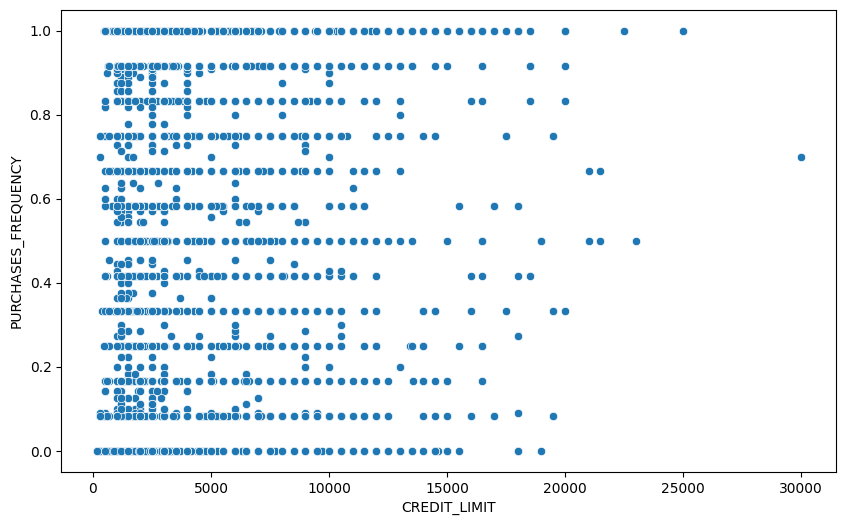

In [12]:
# buat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES_FREQUENCY', data=df_EDA2)

>Berdasarkan pengamatan pada scatterplot di atas, dapat dilihat diamati beberapa hal penting:
1. Data banyak tersebar pada user dengan limit kredit yang lebih rendah.
2. Artinya user dengan limit kredit yang lebih tinggi berjumlah lebih sedikit.
3. User dengan limit kredit lebih rendah terlihat banyak dan datanya tersebar dari frekuensi pembelian rendah sampai tinggi.
4. Untuk user dengan limit kredit tinggi berjumlah lebih sedikit namun dapat diamati bahwa semakin tinggi limit kreditnya, user cenderung memiliki frekuensi pembelian lebih tinggi.
Untuk analisis lebih lanjut akan dibuat bar chart untuk memperjelas visualisasi data.

### Analisis 2

<Axes: xlabel='CREDIT_LIMIT', ylabel='PURCHASES_FREQUENCY'>

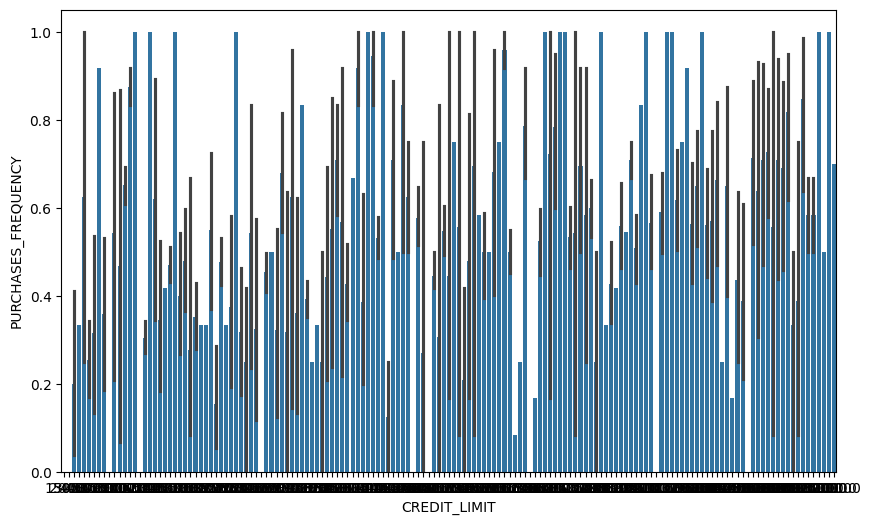

In [13]:
# buat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='CREDIT_LIMIT', y='PURCHASES_FREQUENCY', data=df_EDA2)

>Setelah dibuat bar chart, sepertinya kurang bisa menggambarkan kondisi user dan dirasa sulit untuk mencari polanya. Untuk itu dilakukan visualisasi kembali menggunakan rata-rata dari kelompok limit kredit. Saya meminta bantuan AI untuk membuatkan saya bar chart yang dimaksud.

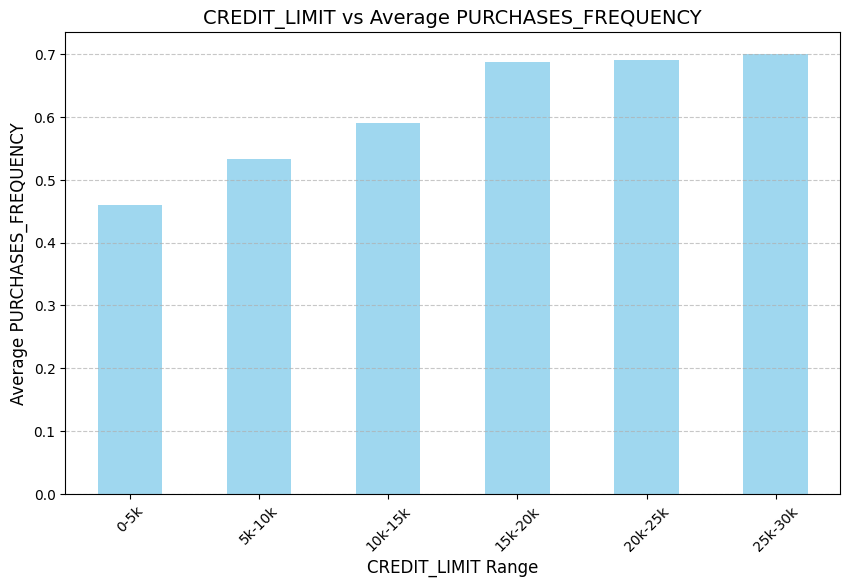

In [14]:
# Membuat kategori (binning) untuk CREDIT_LIMIT
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]  # Rentang limit
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k']
df_EDA2['CREDIT_LIMIT_BIN'] = pd.cut(df_EDA2['CREDIT_LIMIT'], bins=bins, labels=labels, include_lowest=True)

# Menghitung rata-rata PURCHASES_FREQUENCY untuk setiap kategori
grouped_data = df_EDA2.groupby('CREDIT_LIMIT_BIN')['PURCHASES_FREQUENCY'].mean()

# Plot bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue', alpha=0.8)

# Pengaturan visual
plt.title('CREDIT_LIMIT vs Average PURCHASES_FREQUENCY', fontsize=14)
plt.xlabel('CREDIT_LIMIT Range', fontsize=12)
plt.ylabel('Average PURCHASES_FREQUENCY', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

>Hasil dari pembuatan barchart menunjukkan bahwa ternyata semakin tinggi limit dari kartu, rata-rata frekuensi pembelian dari user semakin tinggi.

### Rekomendasi

>Untuk meningkatkan user dengan frekuensi pembelian tinggi, saya memiliki beberapa rekomendasi:
1. Dapat dilihat bahwa user dengan limit kredit rendah berjumlah jauh lebih banyak namun data tersebar relatif rata dari frekuensi rendah ke tinggi. Kita dapat meningkatkan frekuensi pembelian dari user dengan limit kredit rendah dengan memberikan promosi agar user-user tersebut lebih banyak melakukan transaksi.
2. Dilihat dari rata-rata frekuensi pembelian setiap kelompok limit kredit, semakin tinggi limitnya, rata-rata frekuensi pembelian juga semakin tinggi. Dari kecenderungan ini kita dapat mencoba menaikkan limit kredit user secara bertahap ke arah yang lebih tinggi agar frekuensi pembeliannya juga ikut naik. Saya merekomendasikan untuk menaikkan limit user-user yang memiliki nilai `BALANCE` rendah (sisa limit kartu kedit rendah) dan `PAYMENTS` tinggi untuk memilih user yang butuh limit lebih tinggi namun disiplin dalam membayar tagihan untuk menghindari potensi user gagal bayar.

# 6 FEATURE ENGINEERING

Sebelum melakukan feature engineering, kita perlu memilih fitur mana saja yang diperkirakan tidak akan membantu proses clustering. Dalam hal ini fitur tersebut adalah `CUST_ID`.

In [15]:
# hapus fitur yang tidak relevan
df_FE = df.drop(columns=['CUST_ID'])

In [16]:
# tampilkan info dari dataframe untuk diamati kembali
df_FE.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

## Handling Missing Value

### Fitur MINIMUM_PAYMENTS

Untuk menentukan cara handle missing value dari fitur `MINIMUM_PAYMENTS`, dibuat scatter plot untuk mencari pola dari fitur `MINIMUM_PAYMENTS` terhadap fitur lainnya.

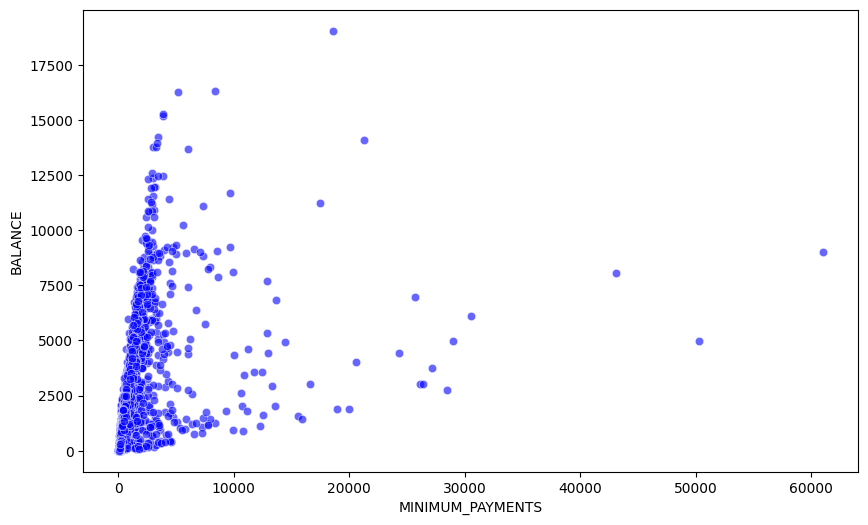

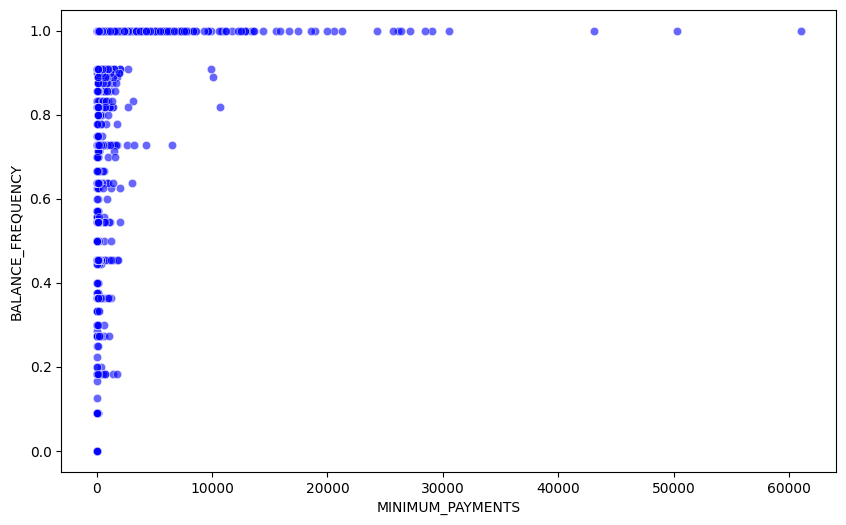

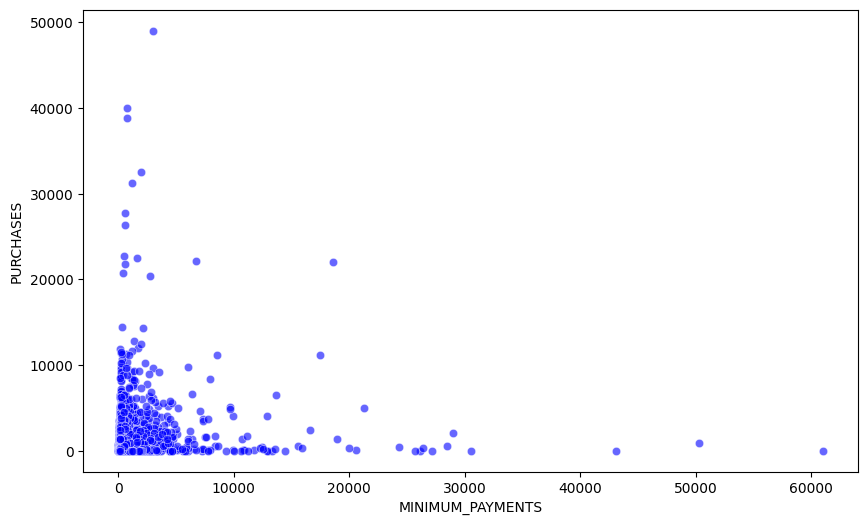

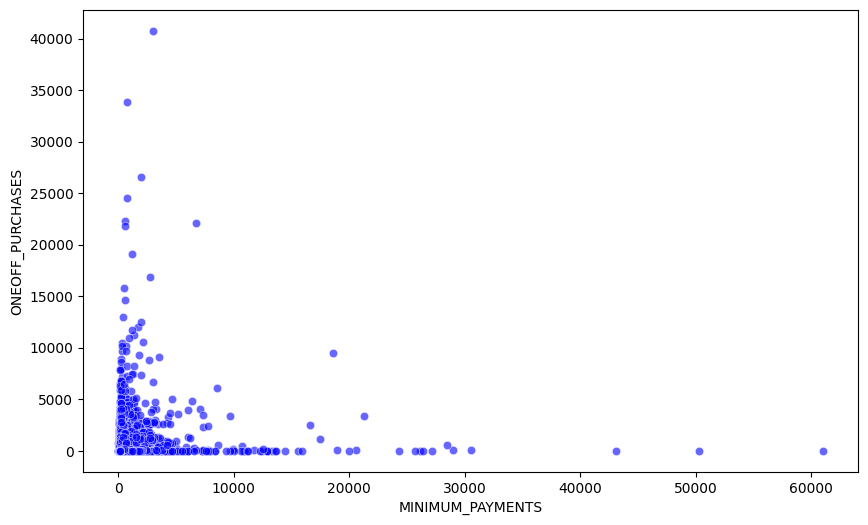

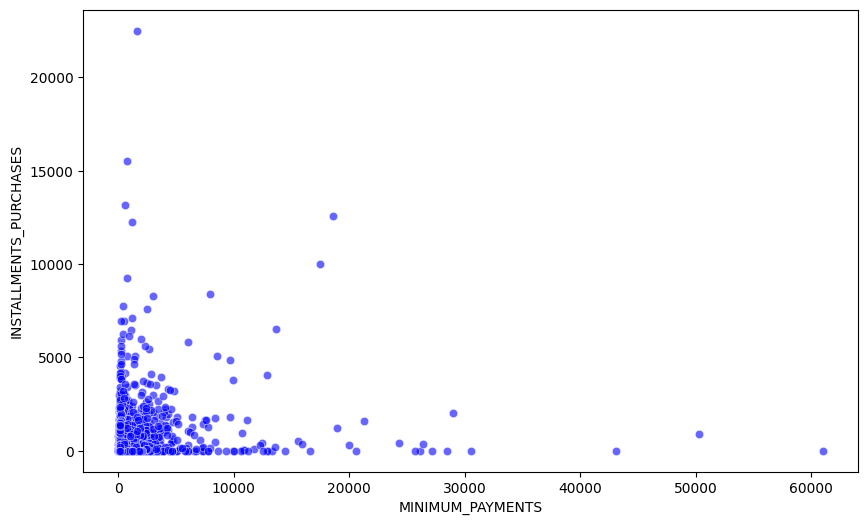

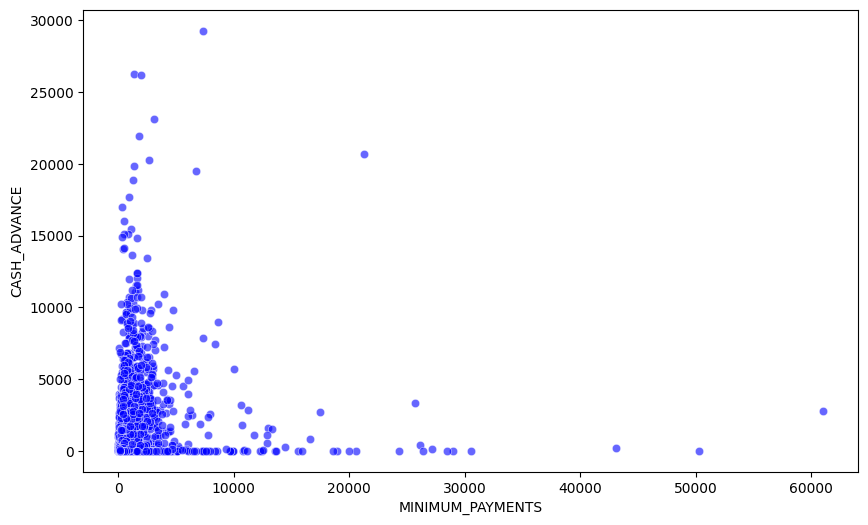

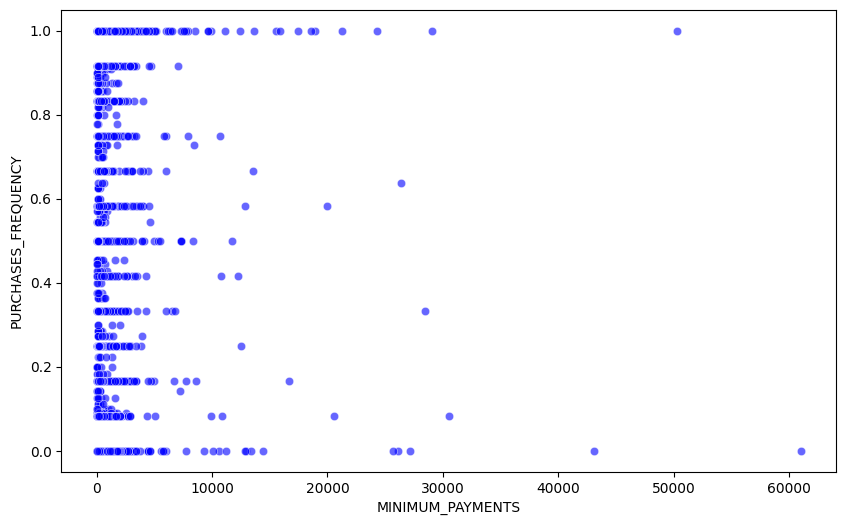

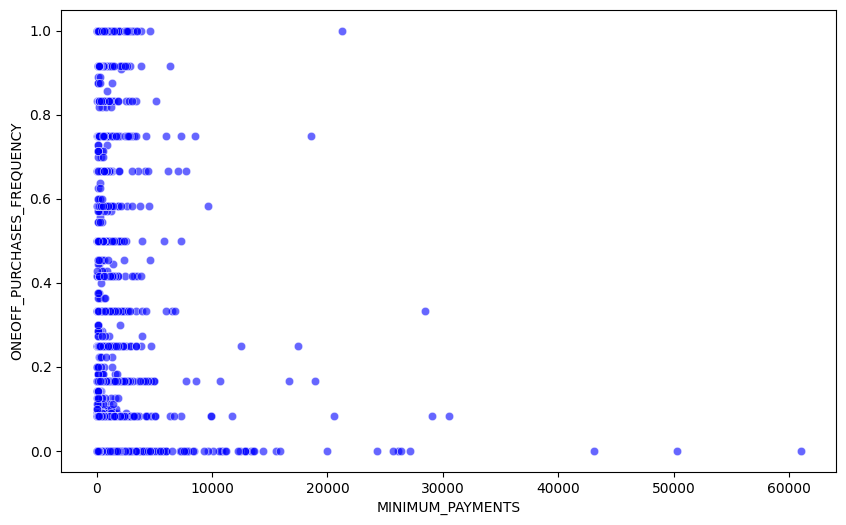

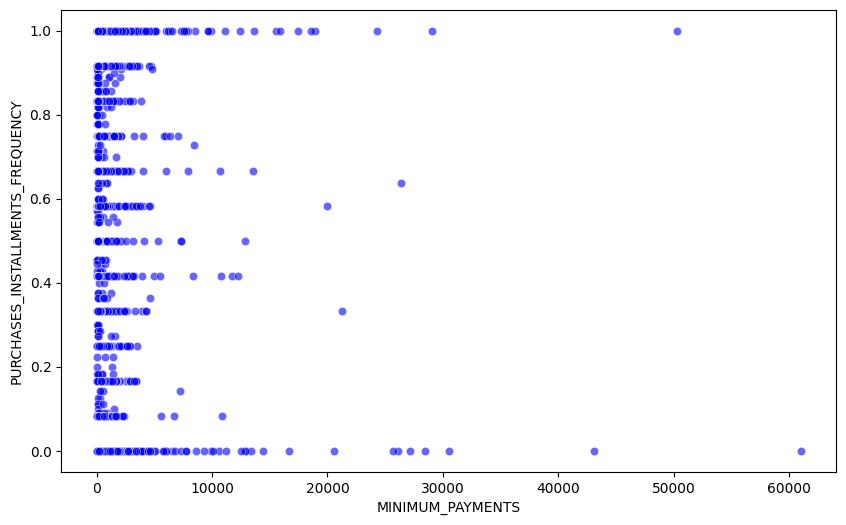

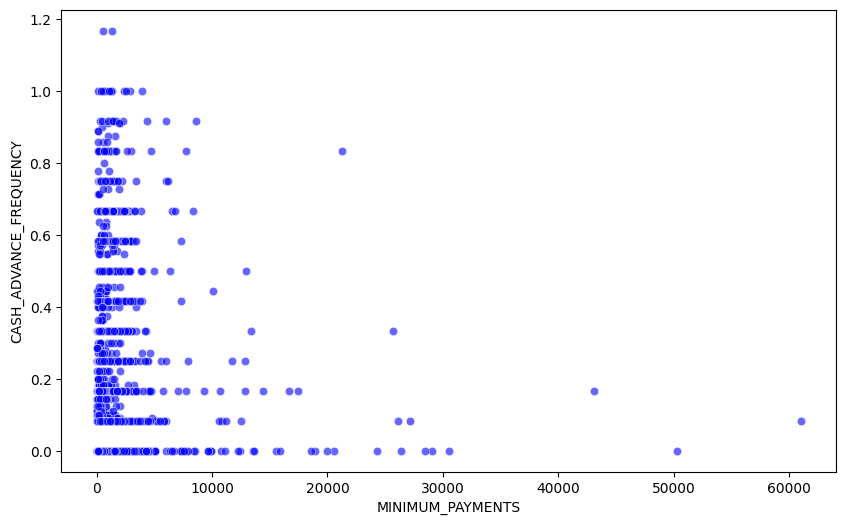

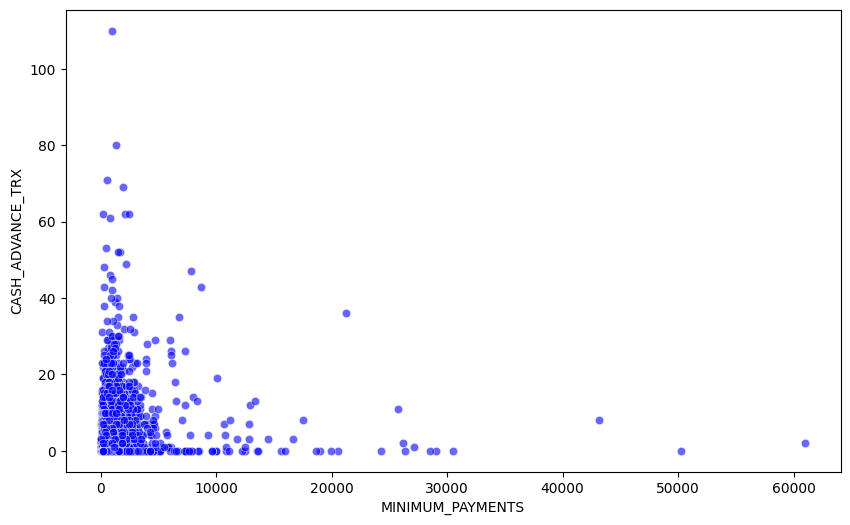

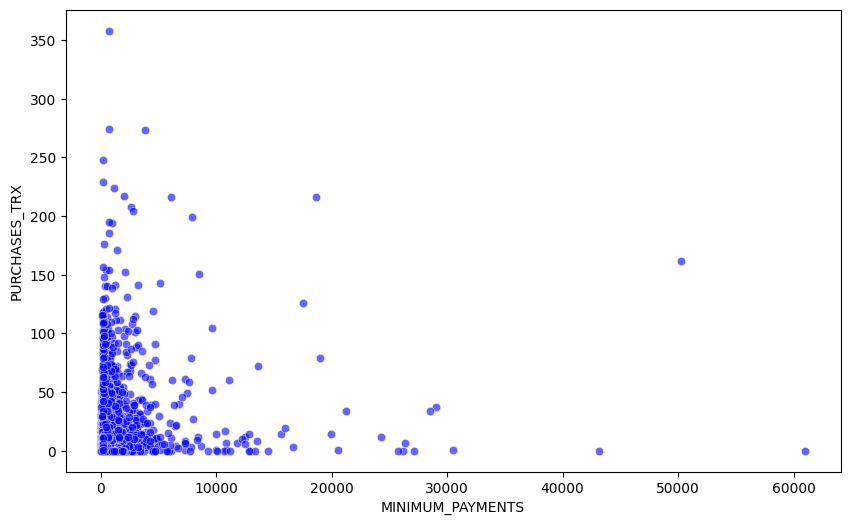

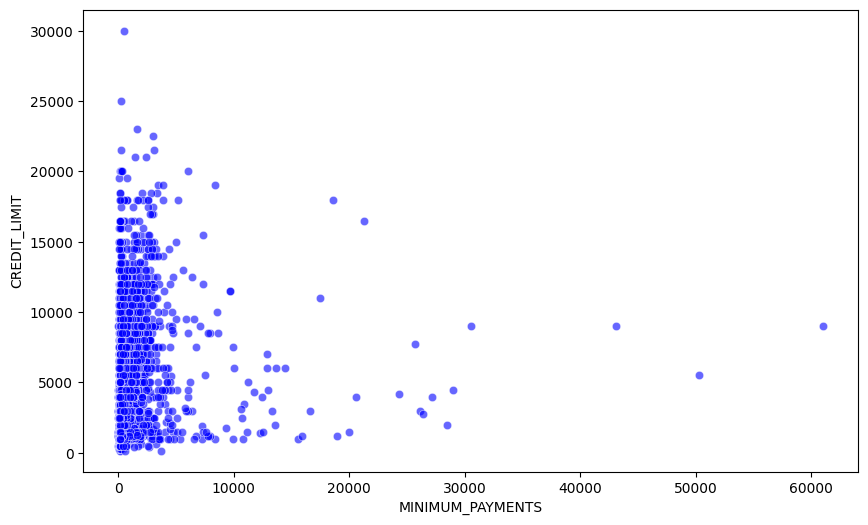

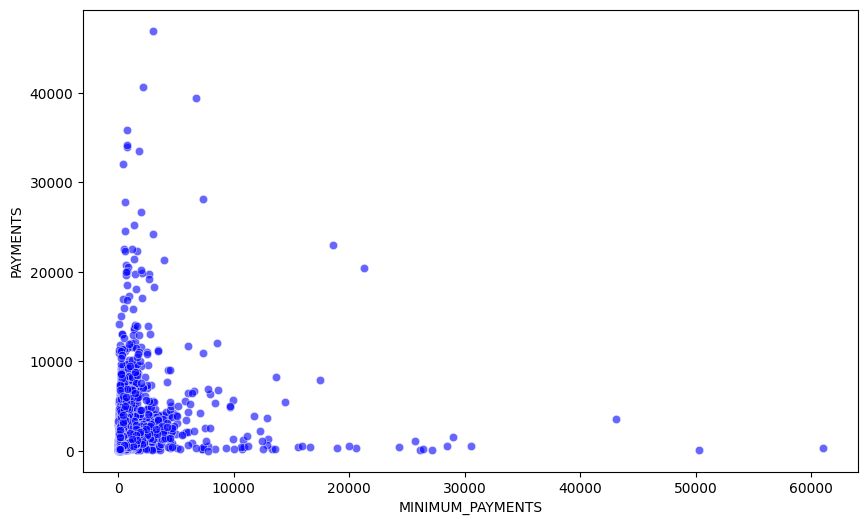

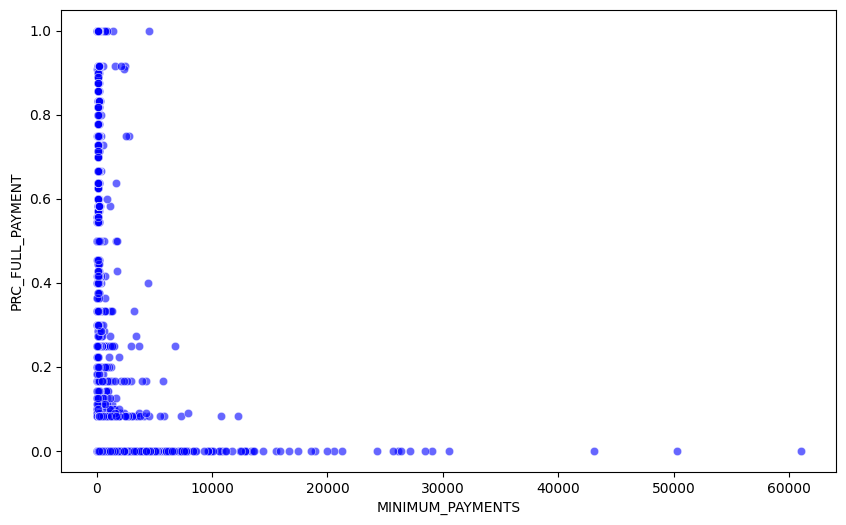

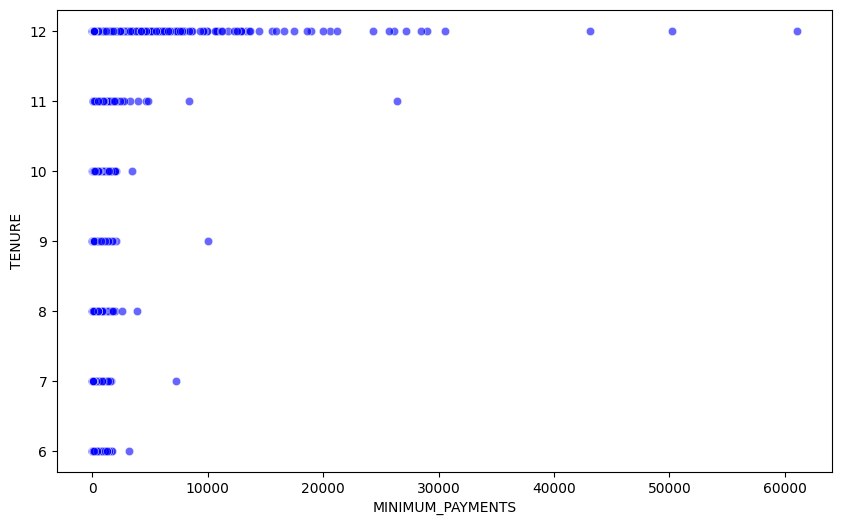

In [17]:
y_variables = df_FE.drop(columns='MINIMUM_PAYMENTS')

for y_var in y_variables:
    plt.figure(figsize=(10, 6))
    
    # Scatter plot untuk MINIMUM_PAYMENTS vs variabel lainnya
    sns.scatterplot(x='MINIMUM_PAYMENTS', y=y_var, data=df_FE, color='blue', alpha=0.6)

>Setelah diamati, `MINIMUM_PAYMENTS` tidak memiliki hubungan linear yang jelas dengan variabel lainnya sehingga tidak bisa diisi berdasarkan hasil perhitungan fitur lainnya.<br>
Maka saya akan mengisi missing value menggunakan input sederhana berdasarkan jenis persebaran datanya.

In [18]:
# cek normalitas distribusi
df_FE['MINIMUM_PAYMENTS'].skew()

12.357860274482807

In [19]:
# cek nilai distribusi
df_FE['MINIMUM_PAYMENTS'].describe()

count     4317.000000
mean       854.429538
std       2306.411178
min          0.037744
25%        169.814310
50%        309.854995
75%        830.395060
max      61031.618600
Name: MINIMUM_PAYMENTS, dtype: float64

<Axes: xlabel='MINIMUM_PAYMENTS'>

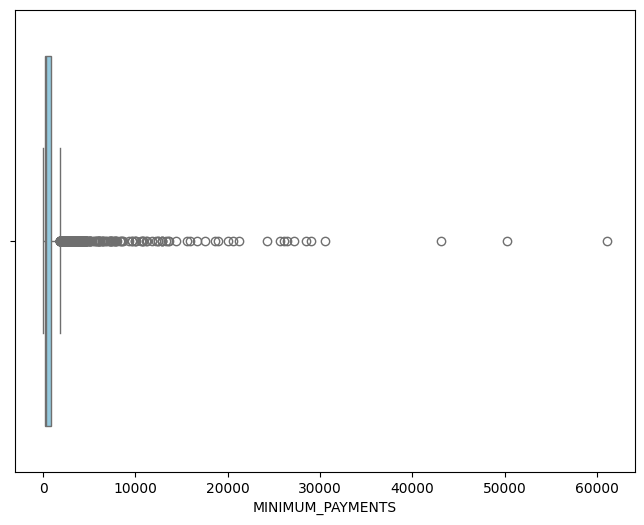

In [20]:
# cek boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_FE['MINIMUM_PAYMENTS'], color='skyblue')

>Karena distribusi data termasuk highly skewed, maka inputasi missing value akan dilakukan menggunakan nilai median karena tidak tertarik terlalu jauh ke arah outlier.

In [21]:
# isi missing value menggunakan nilai tengah distribusi
df_FE['MINIMUM_PAYMENTS'] = df_FE['MINIMUM_PAYMENTS'].fillna(df_FE['MINIMUM_PAYMENTS'].median())
df_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

### Fitur CREDIT_LIMIT

In [22]:
# cek normalitas distribusi
df_FE['CREDIT_LIMIT'].skew()

1.5450779677462632

In [23]:
# cek nilai distribusi
df_FE['CREDIT_LIMIT'].describe()

count     4474.000000
mean      4494.020175
std       3668.535689
min        150.000000
25%       1500.000000
50%       3000.000000
75%       6000.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

<Axes: xlabel='CREDIT_LIMIT'>

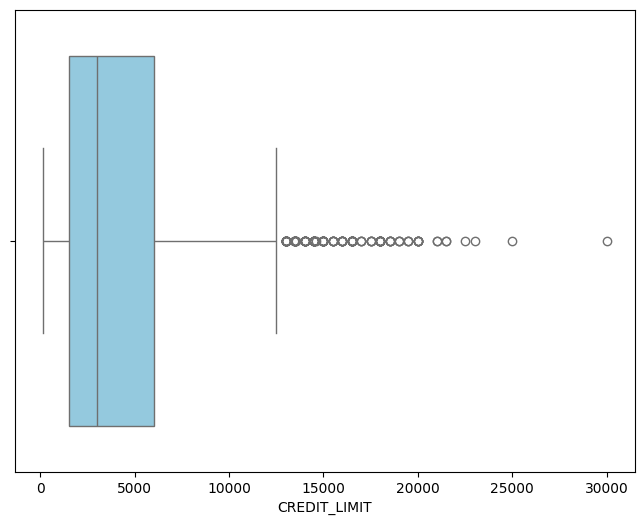

In [24]:
# cek boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_FE['CREDIT_LIMIT'], color='skyblue')

>Karena distribusi data termasuk highly skewed, maka inputasi missing value akan dilakukan menggunakan nilai median karena tidak tertarik terlalu jauh ke arah outlier.

In [25]:
# isi missing value dengan nilai median
df_FE['CREDIT_LIMIT'] = df_FE['CREDIT_LIMIT'].fillna(df_FE['CREDIT_LIMIT'].median())
df_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

## Cek dan Handling Outlier

>Untuk outlier, mengingat data ini merupakan data keuangan yang dikhawatirkan outlier merupakan data penting, maka tidak dilakukan handling outlier.

## Feature Scaling + Dimentionality Reduction

>Scaling dilakukan dengan standard scaler mengingat data termasuk highly skewed agar nilai mean menjadi nol dan standar deviasi menjadi 1

In [26]:
# gunakan standard scaler
scaler = StandardScaler()

# lakukan scaling terhadap dataframe
df_FE_scaled = scaler.fit_transform(df_FE)

>Selanjutnya melakukan pengurangan dimensi dari dataframe dengan principal component analysis. Namun sebelum melakukannya kita harus cek berapa komponen yang paling optimal untuk digunakan

In [27]:
pca = PCA()
pca.fit(df_FE_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

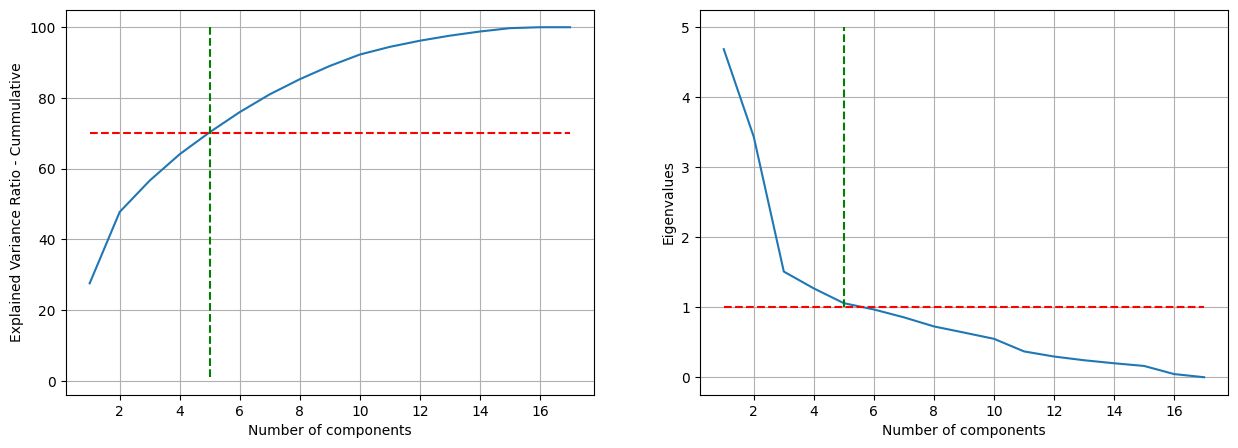

In [28]:
# buat plot explained variance ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.hlines(70, 1, 17, colors='r', linestyles='dashed')
plt.vlines(5, 1, 100, colors='g', linestyles='dashed')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# buat plot eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.hlines(1, 1, 17, colors='r', linestyles='dashed')
plt.vlines(5, 1, 5, colors='g', linestyles='dashed')
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

>Dari hasil pengamatan kedua plot di atas, diputuskan cukup menggunakan 5 dari 17 komponen karena nilai eigenvalue di atas 1 dan masih mewakili 75% dari nilai variansi data.

In [29]:
# buat pca menggunakan 5 komponen dari df
pca = PCA(n_components=5)
df_FE_scaled_reduced = pca.fit_transform(df_FE_scaled)

# 7 MODEL DEFINITION

>Untuk model kita akan menggunakan K-Means walau kondisinya kurang ideal mengingat banyak outlier yang tidak dihandle. Karena kita harus menentukan jumlah cluster paling optimal, maka kita harus mencarinya menggunakan elbow method dan silhouette score.

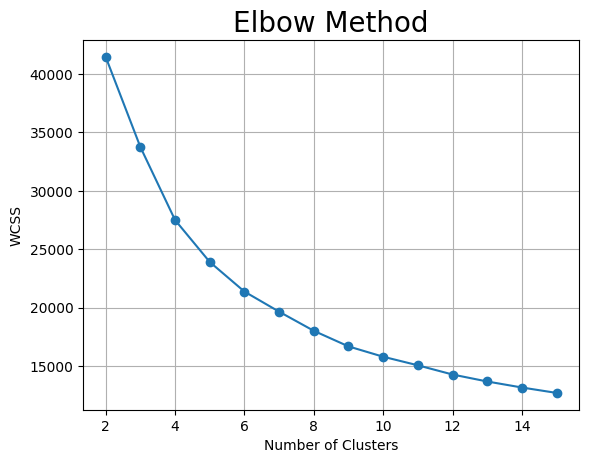

In [30]:
# buat WCSS untuk menentukan jumlah cluster paling optimal menggunakan elbow method
wcss = []
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 69) # nice
    km.fit(df_FE_scaled_reduced)
    wcss.append(km.inertia_)

# buat plot dari hasil kalkulasi WCSS
plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

>Dilihat dari elbow yang kurang jelas, perlu dilakukan metode lain untuk menentukan jumlah cluster. Selanjutnya akan dilakukan pembuatan silhouette plot untuk menentukan jumlah cluster paling optimal.

In [31]:
# buat fungsi untuk membuat silhouette plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.27864615684585364
For n_clusters = 3 The average silhouette_score is : 0.31947720702712745
For n_clusters = 4 The average silhouette_score is : 0.2866993385995732
For n_clusters = 5 The average silhouette_score is : 0.2827279022162845


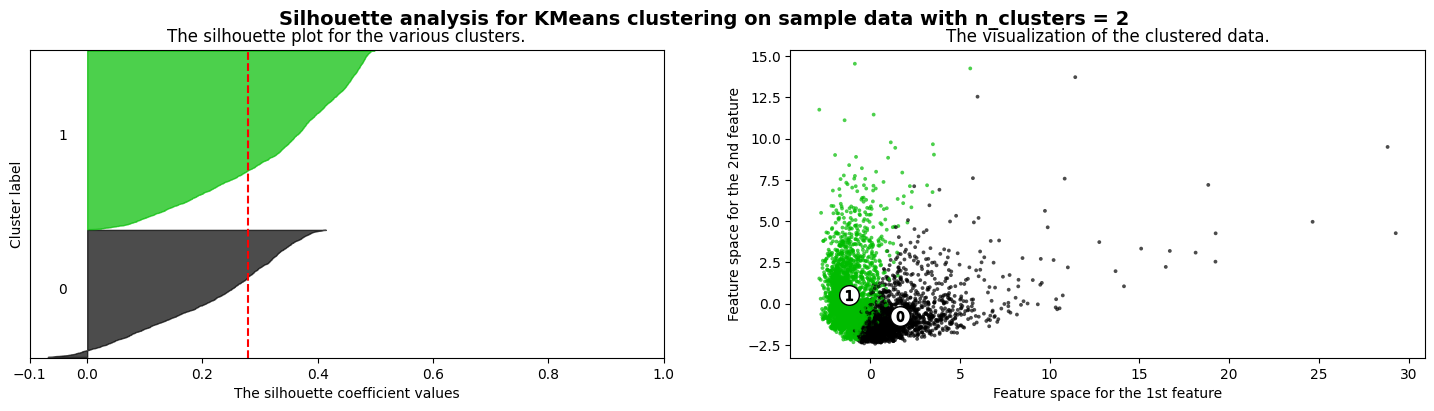

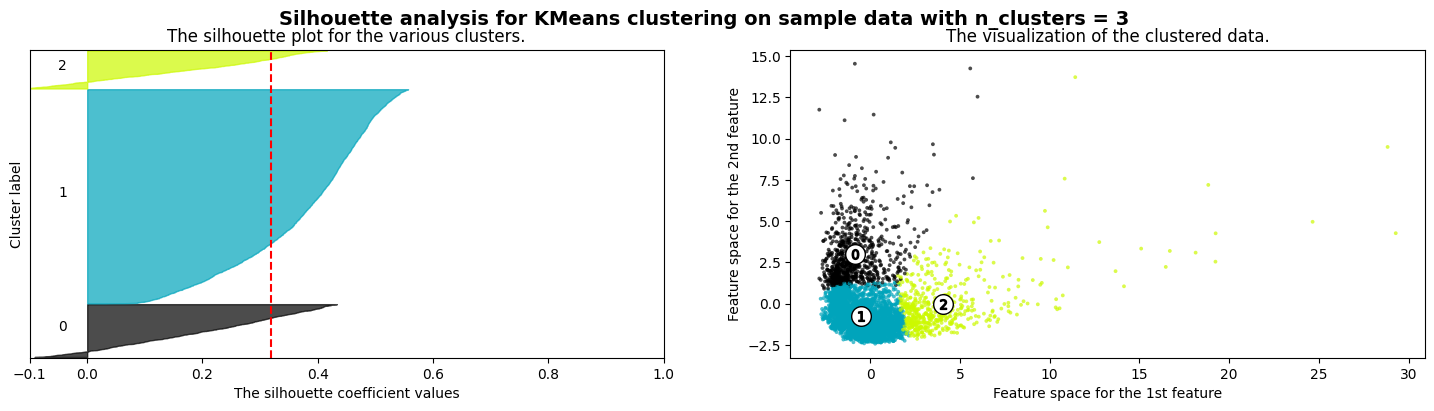

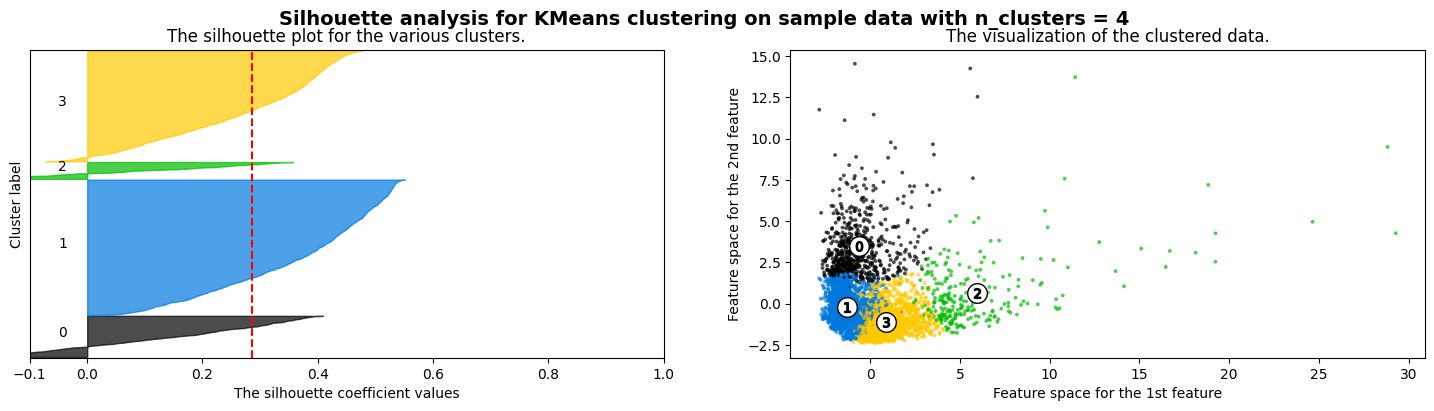

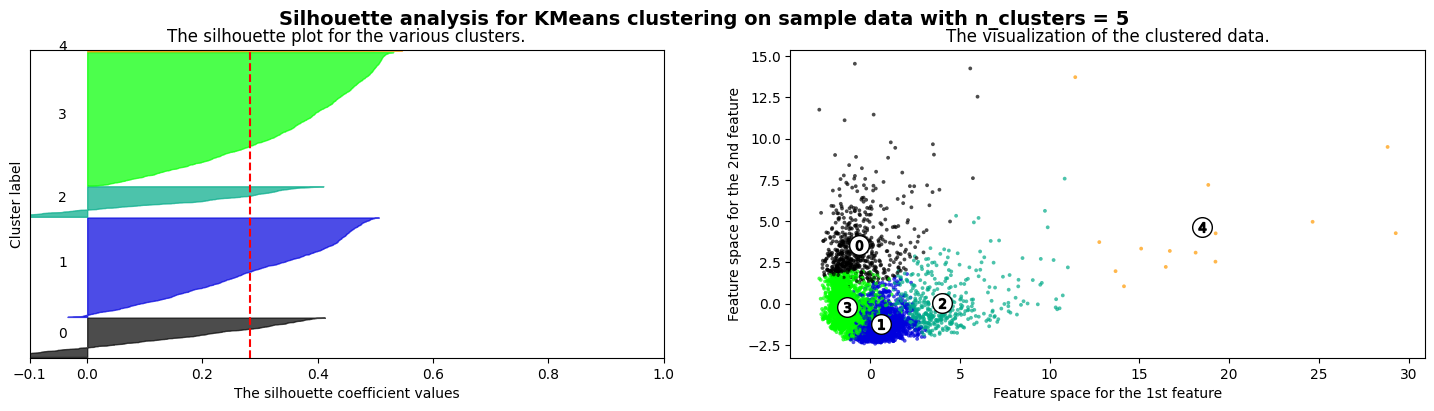

In [32]:
# gunakan fungsi yang sudah dibuat untuk menunjukan silhouette score dan silhouette plot dari masing-masing jumlah cluster
plot_silhouette(range(2, 6), df_FE_scaled_reduced,69) # nice

>Berdasarkan silhouette score, cluster paling optimal berjumlah 3 cluster. Dilihat dari silhouette plot juga jumlah cluster paling baik adalah 3 walaupun memiliki sejumlah data yang tidak dapat ditentukan dengan baik masuk cluster mana dari cluster 0 dan 2 (bernilai -1). Namun untuk cluster 1, model memiliki keyakinan yang baik dalam pengelompokkannya. Penentuan 3 cluster juga didukung dengan silhouette coefficient values yang relatif seimbang antar cluster.

# 8 MODEL TRAINING

In [33]:
# latih model dengan menggunakan jumlah cluster optimal
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 69) # nice
pred = km.fit_predict(df_FE_scaled_reduced)
pred

array([1, 0, 1, ..., 1, 1, 1])

In [34]:
# masukkan hasil clustering ke dalam dataframe asli
df['CLUSTER'] = pred
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,2,4613.570499,1.0,0.00,0.00,0.00,1728.341939,0.000000,0.000000,0.000000,0.090909,1,0,6000.0,922.218961,1460.635220,0.0,11,1
1,4,2583.247881,1.0,1337.35,45.65,1291.70,2484.594650,1.000000,0.083333,1.000000,0.500000,18,21,3000.0,819.792196,6404.855484,0.0,12,0
2,6,1597.911395,1.0,0.00,0.00,0.00,162.919727,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,548.420841,416.956325,0.0,12,1
3,8,3506.489102,1.0,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.0,6,0
4,10,2306.310095,1.0,359.96,0.00,359.96,2843.482435,0.916667,0.000000,0.916667,0.333333,6,11,4000.0,1482.816136,2056.434829,0.0,12,1


# 9 MODEL EVALUATION

>Untuk melakukan evaluasi hasil clustering, saya menggunakan analisis dengan cara visualisasi untuk membandingkan cluster dengan semua fitur karena dengan cara ini saya mampu mengamati perbedaan masing-masing cluster dengan jelas.

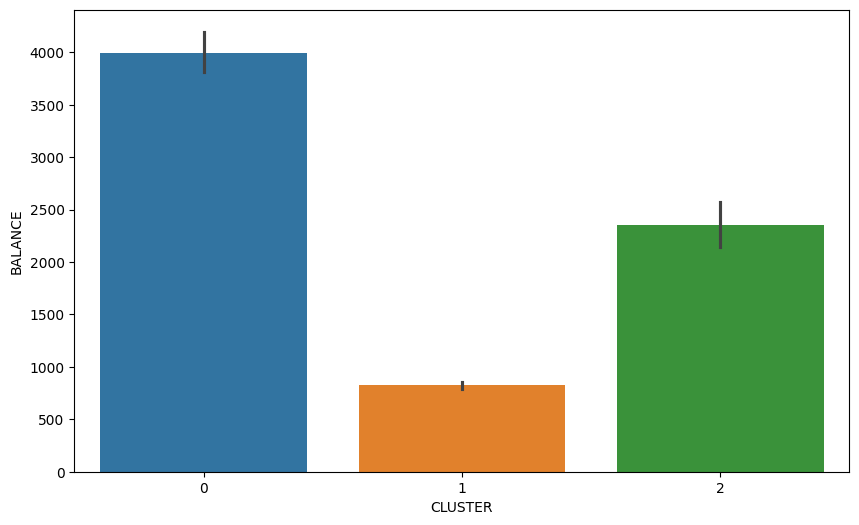

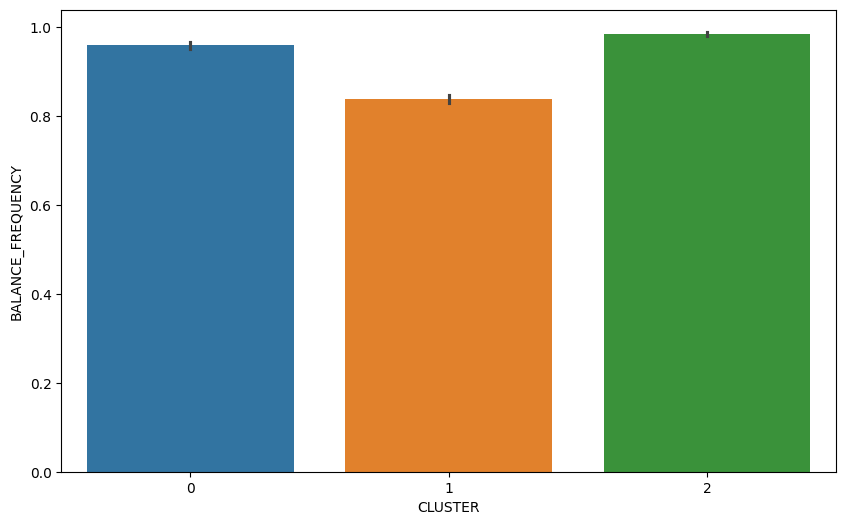

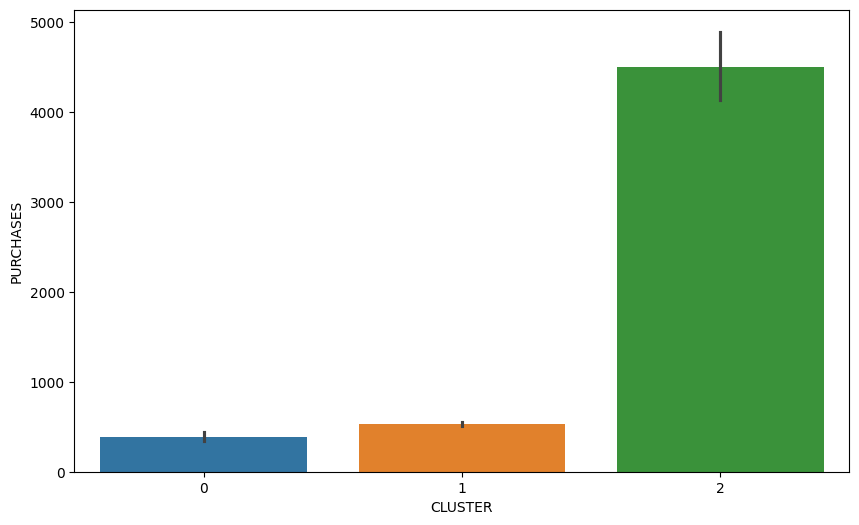

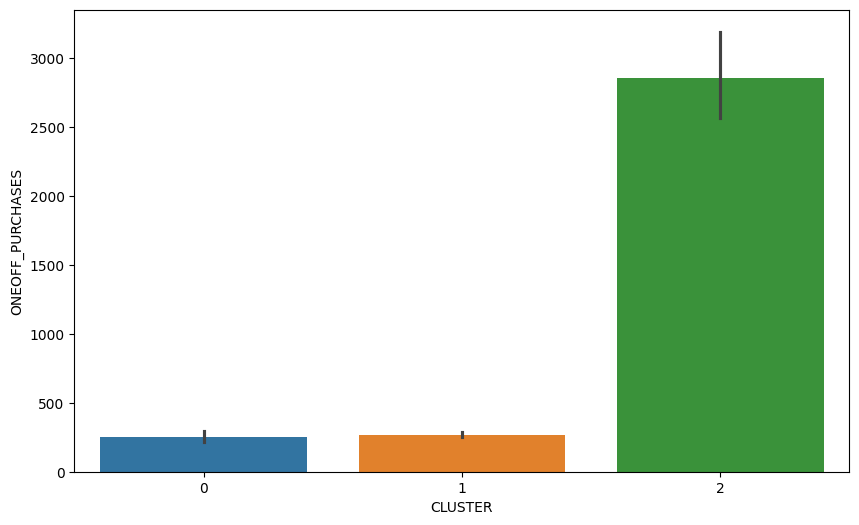

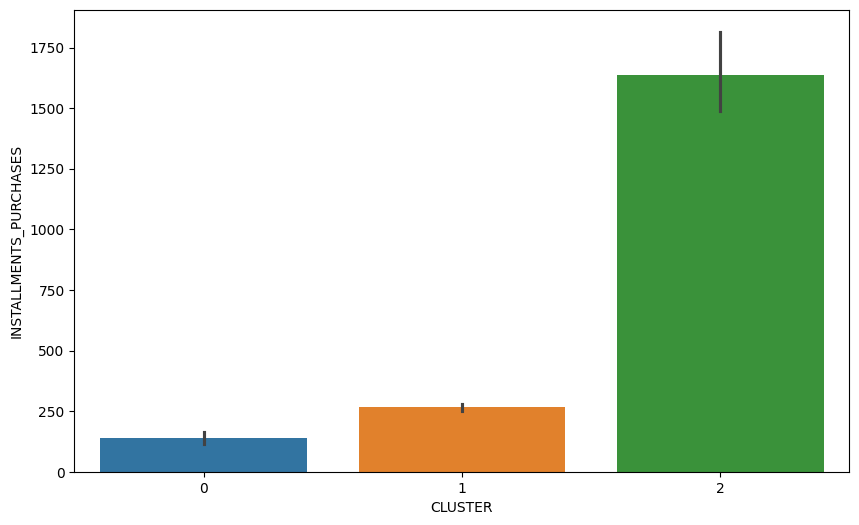

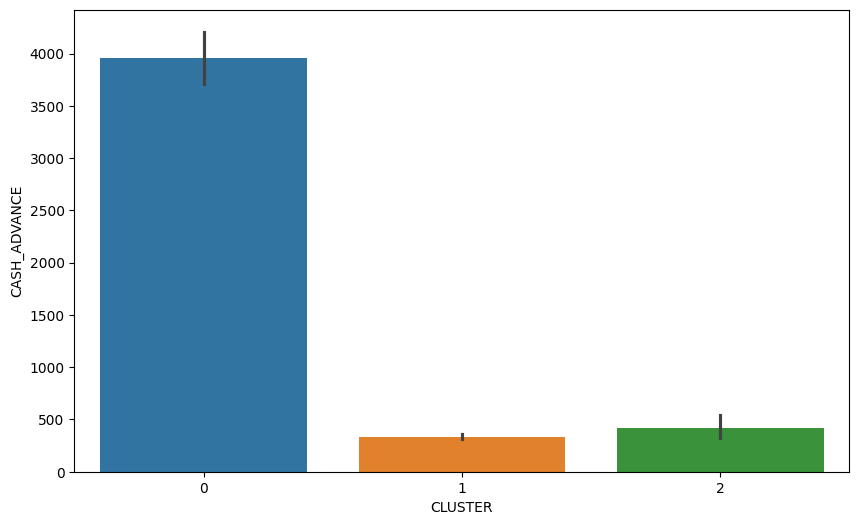

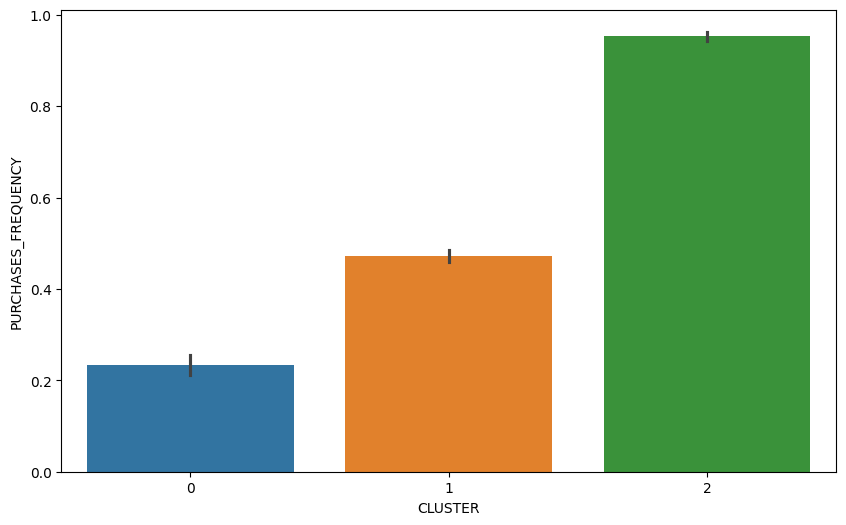

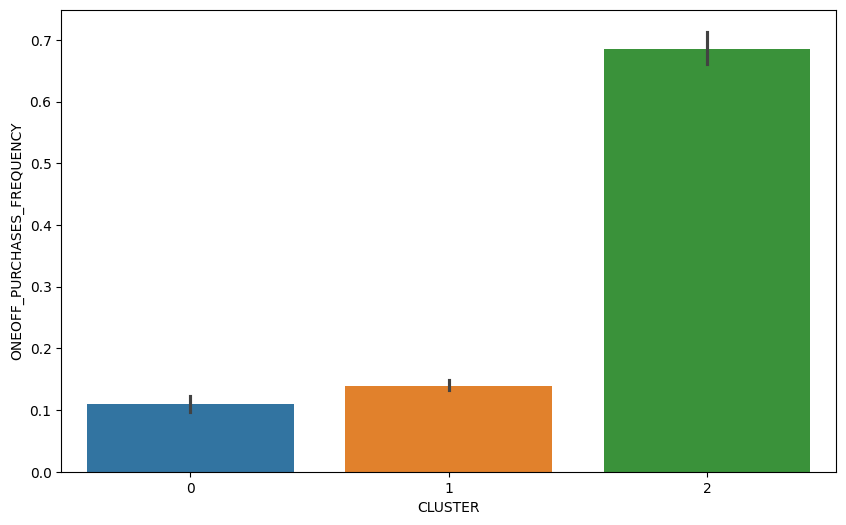

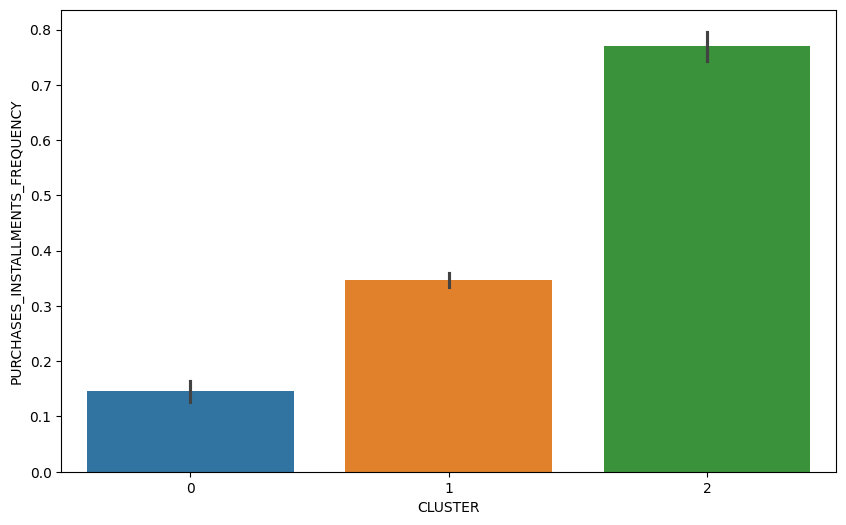

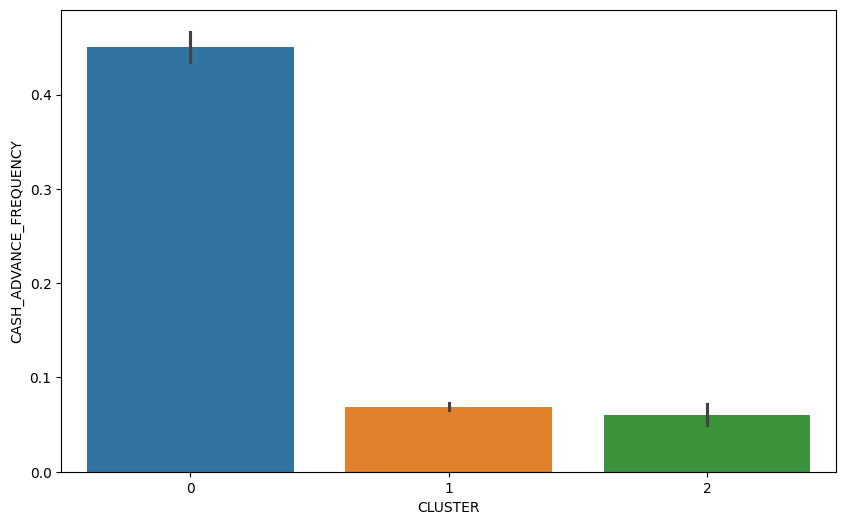

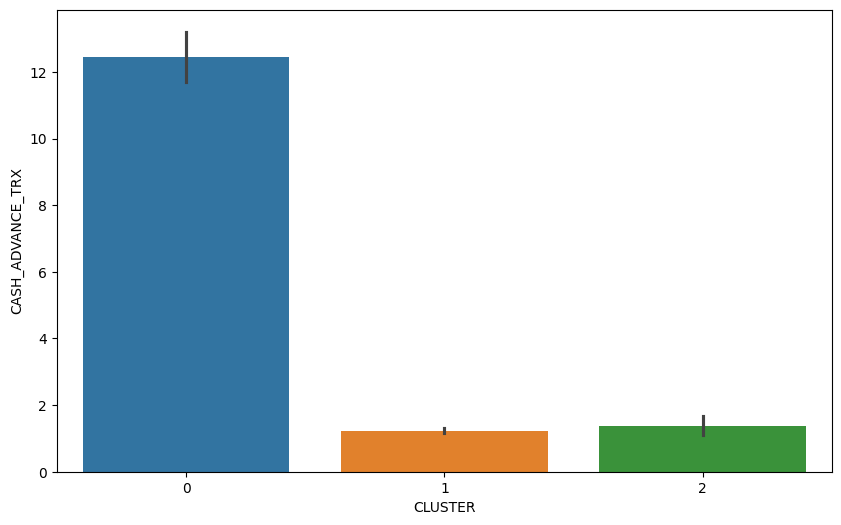

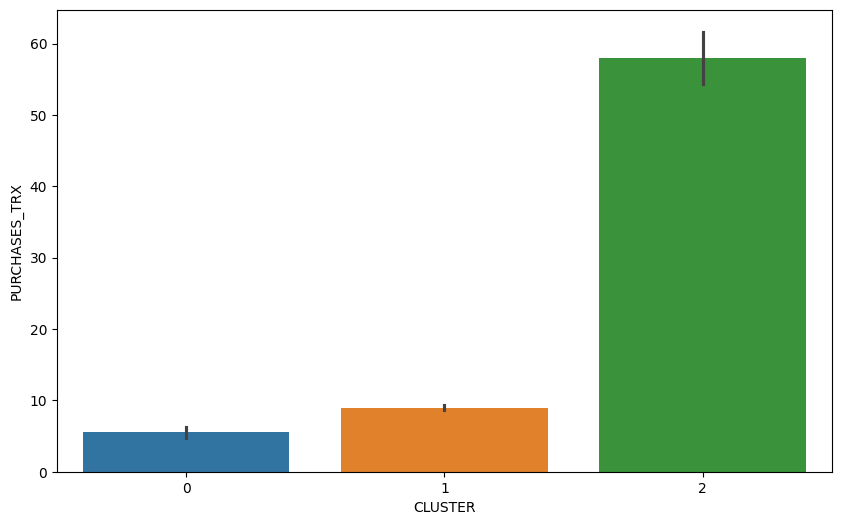

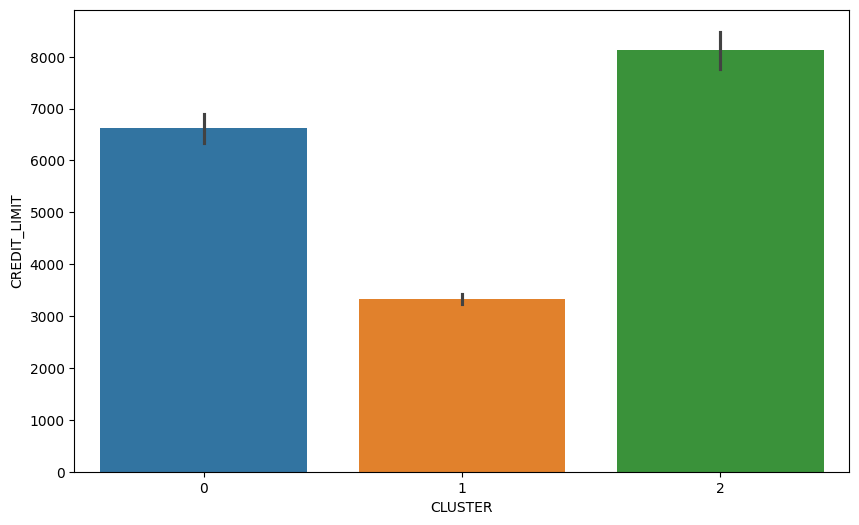

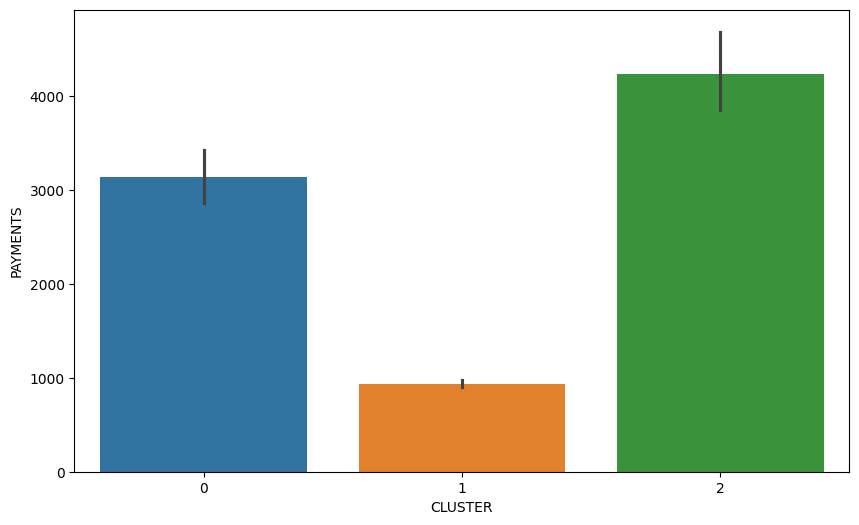

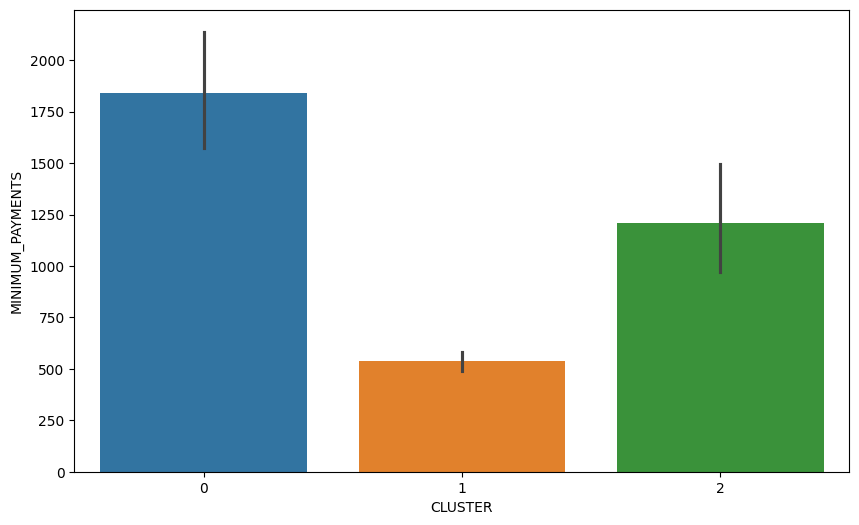

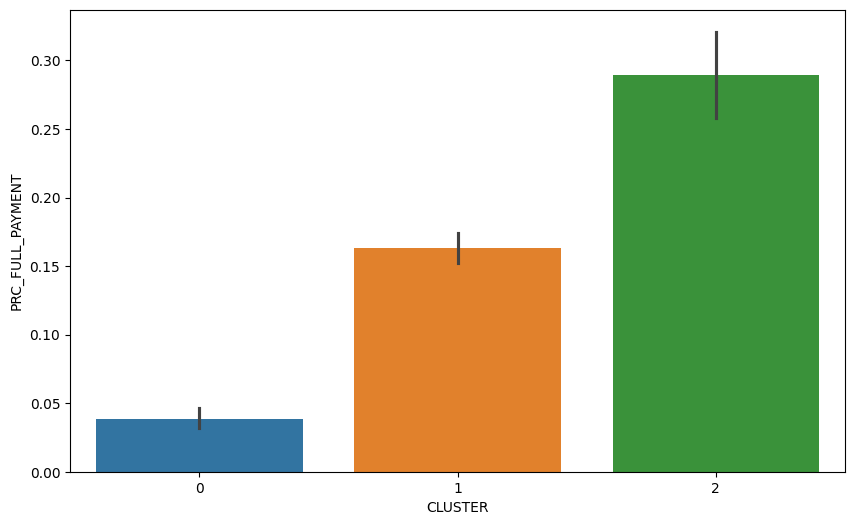

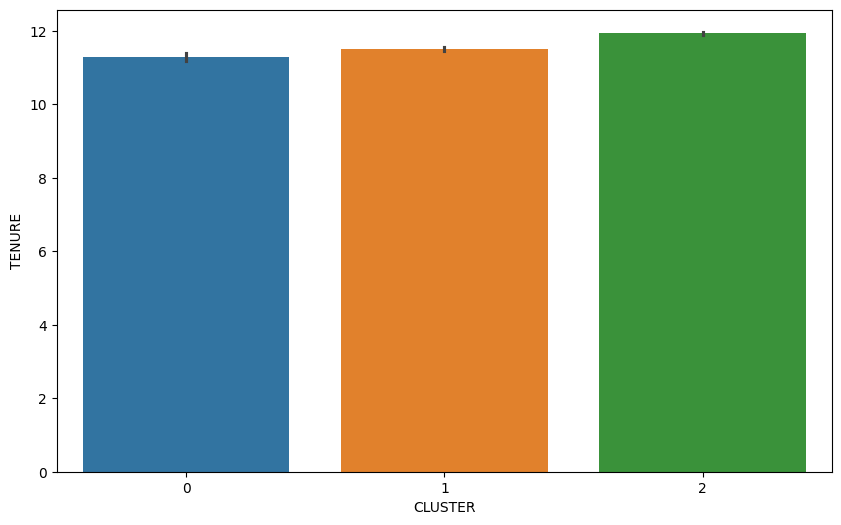

In [35]:
# buat variabel berisi fitur yang ingin dibandingkan dengan cluster
y_variables = df.drop(columns=['CLUSTER','CUST_ID'])

# buat for loop untuk membuat visualisasi antara cluster dan seluruh fitur
for y_var in y_variables:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='CLUSTER', y=y_var, data=df, palette='tab10')
    plt.show()

>Karena fitur yang dibandingkan cukup banyak, saya akan menganalisis dengan melakukan klasifikasi karakter masing-masing cluster berdasarkan keunggulan atau kelemahan dari setiap fitur.

Kelompokkan masing-masing karakter cluster ke dalam 3 nilai yaitu tinggi, sedang dan rendah.

Tabel Analisa Clustering Tahap 1
|Fitur|Cluster 0|Cluster 1|Cluster 2|
|--|--|--|--|
|`BALANCE`|Tinggi|Sedang|Rendah|
|`BALANCE_FREQUENCY`|Tinggi|Tinggi|Tinggi|
|`PURCHASES`|Rendah|Tinggi|Rendah|
|`ONEOFF_PURCHASES`|Rendah|Tinggi|Rendah|
|`INSTALLMENTS_PURCHASES`|Rendah|Tinggi|Rendah|
|`CASH_ADVANCE`|Tinggi|Rendah|Rendah|
|`PURCHASES_FREQUENCY`|Rendah|Tinggi|Rendah|
|`ONEOFF_PURCHASES_FREQUENCY`|Rendah|Tinggi|Rendah|
|`PURCHASES_INSTALLMENTS_FREQUENCY`|Rendah|Tinggi|Rendah|
|`CASH_ADVANCE_FREQUENCY`|Tinggi|Rendah|Rendah|
|`CASH_ADVANCE_TRX`|Tinggi|Rendah|Rendah|
|`PURCHASES_TRX`|Rendah|Tinggi|Rendah|
|`CREDIT_LIMIT`|Tinggi|Tinggi|Sedang|
|`PAYMENTS`|Sedang|Tinggi|Rendah|
|`MINIMUM_PAYMENTS`|Tinggi|Sedang|Rendah|
|`PRC_FULL_PAYMENT`|Rendah|Tinggi|Sedang|
|`TENURE`|Tinggi|Tinggi|Tinggi|

>Untuk mempermudah dalam identifikasi perilaku masing-masing cluster lakukan penyesuaian terhadap tabel di atas dengan mengelompokkan baris yang memiliki nilai sama, lalu urutkan posisi berdasarkan kesamaan nilai.

Tabel Analisa Clustering Tahap 2
|Fitur|Cluster 0|Cluster 1|Cluster 2|
|--|--|--|--|
|--|--|--|--|
|`CREDIT_LIMIT`|Tinggi|Tinggi|Sedang|
|--|--|--|--|
|`BALANCE`|Tinggi|Sedang|Rendah|
|`MINIMUM_PAYMENTS`|Tinggi|Sedang|Rendah|
|--|--|--|--|
|`CASH_ADVANCE`|Tinggi|Rendah|Rendah|
|`CASH_ADVANCE_FREQUENCY`|Tinggi|Rendah|Rendah|
|`CASH_ADVANCE_TRX`|Tinggi|Rendah|Rendah|
|--|--|--|--|
|`PAYMENTS`|Sedang|Tinggi|Rendah|
|--|--|--|--|
|`PRC_FULL_PAYMENT`|Rendah|Tinggi|Sedang|
|--|--|--|--|
|`PURCHASES`|Rendah|Tinggi|Rendah|
|`ONEOFF_PURCHASES`|Rendah|Tinggi|Rendah|
|`INSTALLMENTS_PURCHASES`|Rendah|Tinggi|Rendah|
|`PURCHASES_FREQUENCY`|Rendah|Tinggi|Rendah|
|`ONEOFF_PURCHASES_FREQUENCY`|Rendah|Tinggi|Rendah|
|`PURCHASES_INSTALLMENTS_FREQUENCY`|Rendah|Tinggi|Rendah|
|`PURCHASES_TRX`|Rendah|Tinggi|Rendah|

>Berdasarkan pengelompokkan di atas, tabel dapat disederhanakan kembali dengan menghapus fitur yang memiliki kesamaan sifat dan nilai. Fitur yang memiliki nilai sama namun dari segi sifat berbeda tidak akan dihapus.

Fitur yang akan saya hapus adalah:
- `CASH_ADVANCE_FREQUENCY` karena memiliki nilai dan sifat yang mirip dengan `CASH_ADVANCE`
- `CASH_ADVANCE_TRX` karena memiliki nilai dan sifat yang mirip dengan `CASH_ADVANCE`
- `ONEOFF_PURCHASES` karena memiliki nilai dan sifat yang mirip dengan `PURCHASES`
- `INSTALLMENTS_PURCHASES` karena memiliki nilai dan sifat yang mirip dengan `PURCHASES`
- `PURCHASES_FREQUENCY` karena memiliki nilai dan sifat yang mirip dengan `PURCHASES`
- `ONEOFF_PURCHASES_FREQUENCY` karena memiliki nilai dan sifat yang mirip dengan `PURCHASES`
- `PURCHASES_INSTALLMENTS_FREQUENCY` karena memiliki nilai dan sifat yang mirip dengan `PURCHASES`
- `PURCHASES_TRX` karena memiliki nilai dan sifat yang mirip dengan `PURCHASES`
- Khusus untuk `MINIMUM_PAYMENTS` saya hapus untuk kepentingan penyederhanaan klasifikasi dengan asumsi nilai akan sama dengan `BALANCE` (contoh: transaksi yang besar akan menghasilkan minimum payments yang besar juga).

Tabel Analisa Clustering Tahap 3
|Fitur|Cluster 0|Cluster 1|Cluster 2|
|--|--|--|--|
|--|--|--|--|
|`CREDIT_LIMIT`|Tinggi|Tinggi|Sedang|
|--|--|--|--|
|`BALANCE`|Tinggi|Sedang|Rendah|
|--|--|--|--|
|`CASH_ADVANCE`|Tinggi|Rendah|Rendah|
|--|--|--|--|
|`PAYMENTS`|Sedang|Tinggi|Rendah|
|--|--|--|--|
|`PRC_FULL_PAYMENT`|Rendah|Tinggi|Sedang|
|--|--|--|--|
|`PURCHASES`|Rendah|Tinggi|Rendah|

Setelah dilakukan penyederhanaan terhadap fitur, kita dapat mengamati perbedaan tiap cluster dengan lebih mudah.<br>
Hasil pengamatan umum dari perilaku masing-masing cluster:
>- Cluster 0:<br>
Cenderung memiliki credit limit, balance dan cash advance tinggi, namun payments sedang, prc full payment dan purchase rendah, menandakan `kelompok ini memiliki kecenderungan menggunakan kartu kredit untuk kepentingan tarik tunai dengan nilai tinggi namun tidak digunakan untuk transaksi langsung. Tingkat prc full payment yang rendah juga menandakan kelompok ini kesulitan untuk melunasi tagihan secara penuh. Kalo kata Lia yang mantan orang bank, kelompok yang sering melakukan cash advance merupakan kelompok segmen bawah`. Cluster ini selanjutnya akan disebut cluster `Segmen Bawah`.
>- Cluster 1:<br>
Cenderung memiliki credit limit , payments, prc full payment dan purchases tinggi, namun balance yang sedang dan cash advance yang rendah, menandakan `kelompok ini memiliki kecenderungan memanfaatkan kartu kredit untuk banyak keperluan namun tetap menjaga agar tidak boros (balance sedang). Nilai prc full payment yang tinggi menandakan kelompok ini memiliki sifat disiplin dalam mengatur keuangan, atau memang punya banyak uang untuk melunasi tagihan. Diperkirakan kartu kredit digunakan hanya untuk kenyamanan bertransaksi. Nilai cash advance rendah menandakan kelompok ini lebih sering melakukan transaksi cashless (masuk segmen menengah ke atas) mengingat mesin EDC untuk transaksi kartu kredit hanya berada di tempat bersegmen menengah ke atas (gak pernah jajan di pinggir jalan)`. Cluster ini selanjutnya akan disebut cluster `Segmen Atas`.
>- Cluster 2:<br>
Cenderung memiliki credit limit dan prc full payment sedang, balance, cash advance, payments, purchases rendah menandakan `kelompok ini merupakan kelompok pengguna pasif. Tidak banyak yang bisa dianalisis dari kelompok ini mengingat jumlah aktivitas penggunaan kartu kreditnya relatif sedikit`. Cluster ini selanjutnya akan disebut cluster `Segmen Pasif`.

# 10 MODEL SAVING

In [36]:
# simpan file fitur selection
with open('file_df_FE.pkl', 'wb') as FE_file:
    pickle.dump(df_FE, FE_file)

# simpan file scaler
with open('file_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# simpan file penggunaan jumlah komponen dalam pca
with open('file_pca.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)

# simpan model k-means berisi jumlah cluster optimal
with open('file_kmeans_model.pkl', 'wb') as kmeans_file:
    pickle.dump(km, kmeans_file)

# 11 MODEL INFERENCE

In [38]:
# simpan file fitur selection
with open('file_df_FE.pkl', 'rb') as FE_file:
    load_FE = pickle.load(FE_file)

# simpan file scaler
with open('file_scaler.pkl', 'rb') as scaler_file:
    load_SCALER = pickle.load(scaler_file)

# simpan file penggunaan jumlah komponen dalam pca
with open('file_pca.pkl', 'rb') as pca_file:
    load_PCA = pickle.load(pca_file)

# simpan model k-means berisi jumlah cluster optimal
with open('file_kmeans_model.pkl', 'rb') as kmeans_file:
    load_km = pickle.load(kmeans_file)

In [ ]:
# buat data baru, berikut adalah hasil generate dari gpt
df_inf = {
    "CUST_ID": [35, 46, 77, 90, 322, 898, 1001, 6969],
    "BALANCE": [500, 300, 800, 2000, 4900, 1500, 3000, 5000],
    "BALANCE_FREQUENCY": [1.0, 0.5, 0.8, 1.0, 1.0, 0.9, 1.0, 1.0],
    "PURCHASES": [50, 30, 100, 2000, 1500, 2500, 3000, 1200],
    "ONEOFF_PURCHASES": [20, 10, 40, 1500, 1200, 2300, 2000, 1000],
    "INSTALLMENTS_PURCHASES": [30, 20, 60, 500, 300, 200, 1000, 200],
    "CASH_ADVANCE": [3000, 2000, 1000, 0, 0, 100, 0, 0],
    "PURCHASES_FREQUENCY": [0.2, 0.1, 0.4, 1.0, 0.9, 0.8, 1.0, 0.7],
    "ONEOFF_PURCHASES_FREQUENCY": [0.1, 0.05, 0.2, 0.7, 0.6, 0.5, 0.9, 0.4],
    "PURCHASES_INSTALLMENTS_FREQUENCY": [0.2, 0.1, 0.3, 1.0, 0.8, 0.7, 1.0, 0.5],
    "CASH_ADVANCE_FREQUENCY": [0.5, 0.4, 0.2, 0.0, 0.0, 0.1, 0.0, 0.0],
    "CASH_ADVANCE_TRX": [5, 4, 2, 0, 0, 1, 0, 0],
    "PURCHASES_TRX": [2, 3, 6, 20, 15, 30, 25, 10],
    "CREDIT_LIMIT": [2000, 1500, 3000, 5000, 6000, 4500, 7000, 8000],
    "PAYMENTS": [1500, 1200, 1800, 3000, 4000, 3500, 5000, 2500],
    "MINIMUM_PAYMENTS": [500, 400, 700, 1000, 900, 1200, 1100, 800],
    "PRC_FULL_PAYMENT": [0.1, 0.2, 0.3, 0.7, 0.6, 0.5, 0.8, 0.4],
    "TENURE": [12, 12, 12, 12, 12, 12, 12, 12],
    "CLUSTER": [0, 0, 1, 1, 1, 2, 2, 2]
}

df_inf = pd.DataFrame(df_inf)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,1,500,1.0,50,20,30,3000,0.2,0.10,0.2,0.5,5,2,2000,1500,500,0.1,12,0
1,2,300,0.5,30,10,20,2000,0.1,0.05,0.1,0.4,4,3,1500,1200,400,0.2,12,0
2,3,800,0.8,100,40,60,1000,0.4,0.20,0.3,0.2,2,6,3000,1800,700,0.3,12,1
3,4,2000,1.0,2000,1500,500,0,1.0,0.70,1.0,0.0,0,20,5000,3000,1000,0.7,12,1
4,5,4900,1.0,1500,1200,300,0,0.9,0.60,0.8,0.0,0,15,6000,4000,900,0.6,12,1
5,6,1500,0.9,2500,2300,200,100,0.8,0.50,0.7,0.1,1,30,4500,3500,1200,0.5,12,2
6,7,3000,1.0,3000,2000,1000,0,1.0,0.90,1.0,0.0,0,25,7000,5000,1100,0.8,12,2
7,8,5000,1.0,1200,1000,200,0,0.7,0.40,0.5,0.0,0,10,8000,2500,800,0.4,12,2


In [40]:
# masukan dataframe ke dalam file fitur selection
df_inf_FE = df_inf[load_FE.columns]

# masukan dataframe ke dalam file scaler
df_inf_FE_scaled = load_SCALER.transform(df_inf_FE)

# masukan dataframe ke dalam file pca
df_inf_FE_scaled_reduced = load_PCA.transform(df_inf_FE_scaled)

# masukan dataframe ke dalam file model
df_inf_FE_scaled_reduced_predict = load_km.predict(df_inf_FE_scaled_reduced)

User Data Inference dengan ID 1 termasuk ke dalam: SEGMEN BAWAH
User Data Inference dengan ID 2 termasuk ke dalam: SEGMEN ATAS
User Data Inference dengan ID 3 termasuk ke dalam: SEGMEN ATAS
User Data Inference dengan ID 4 termasuk ke dalam: SEGMEN PASIF
User Data Inference dengan ID 5 termasuk ke dalam: SEGMEN PASIF
User Data Inference dengan ID 6 termasuk ke dalam: SEGMEN PASIF
User Data Inference dengan ID 7 termasuk ke dalam: SEGMEN PASIF
User Data Inference dengan ID 8 termasuk ke dalam: SEGMEN ATAS


In [41]:
# lakukan grouping/mapping untuk memberi label tiap segmen
cluster_to_segment = {
    0: "SEGMEN BAWAH",
    1: "SEGMEN ATAS",
    2: "SEGMEN PASIF"
}

# buat loop untuk menampilkan hasil prediksi
for i in range(len(df_inf)):
    predicted_cluster = df_inf_FE_scaled_reduced_predict[i]  # Ambil cluster prediksi
    segment = cluster_to_segment.get(predicted_cluster, "SEGMEN TIDAK DIKENAL")  # Mapping ke segmen
    cust_id = df_inf.loc[i, 'CUST_ID']  # Ambil ID pelanggan
    print(f"User Data Inference dengan ID {cust_id} termasuk ke dalam: {segment}")

User Data Inference dengan ID 1 termasuk ke dalam: SEGMEN BAWAH
User Data Inference dengan ID 2 termasuk ke dalam: SEGMEN ATAS
User Data Inference dengan ID 3 termasuk ke dalam: SEGMEN ATAS
User Data Inference dengan ID 4 termasuk ke dalam: SEGMEN PASIF
User Data Inference dengan ID 5 termasuk ke dalam: SEGMEN PASIF
User Data Inference dengan ID 6 termasuk ke dalam: SEGMEN PASIF
User Data Inference dengan ID 7 termasuk ke dalam: SEGMEN PASIF
User Data Inference dengan ID 8 termasuk ke dalam: SEGMEN ATAS


Hasil dari inference berjalan lancar, alhamduLillaah

# 12 PENGAMBILAN KESIMPULAN

Dari semua proses yang dilakukan di atas, dapat ditarik beberapa kesimpulan:
- Dataset berisi informasi transaksi 6 bulan ke belakang dari user kartu kredit, memiliki 3 kelompok dengan kecenderungan perilaku yang berbeda.
- Kelompok `Segmen Bawah` memiliki kecenderungan untuk melakukan cash advance dengan nilai tinggi sampai membuat nilai balance tinggi, namun nilai prc full payment rendah menandakan kelompok ini kesulitan untuk melunasi tagihan secara penuh.
- Kelompok `Segmen Atas` memiliki kecenderungan untuk memanfaatkan kartu kredit untuk banyak keperluan namun tetap menjaga agar tidak boros (balance sedang). Nilai prc full payment yang tinggi menandakan kelompok ini memiliki sifat disiplin dalam mengatur keuangan, atau memang punya banyak uang untuk melunasi tagihan.
- Kelompok `Segmen Pasif` tidak banyak yang bisa dianalisis dari kelompok ini mengingat jumlah aktivitas penggunaan kartu kreditnya relatif sedikit.

# 13 PENGAJUAN REKOMENDASI BISNIS

Berdasarkan kesimpulan, saya dapat memberikan beberapa rekomendasi untuk kepentingan pengembangan bisnis berdasarkan pengetahuan yang saya miliki:
- `Segmen Bawah` menyumbang revenue yang relatif lebih tinggi dibanding segmen lainnya dilihat dari nilai prc full payment yang rendah. Jika tidak dilakukan full payment maka bunga akan bertambah besar yang akan menyumbang ke dalam omzet perusahaan. Rekomendasi saya adalah untuk memberikan pengawasan yang lebih tinggi terhadap segmen bawah mengingat segmen ini memiliki potensi gagal bayar paling tinggi dibanding segmen lainnya walaupun menyumbang revenue terbesar.
- `Segmen Atas` merupakan user paling stabil mengingat nilai payment dan prc full payment yang tinggi walau nilai balance sedang. Rekomendasi saya adalah untuk menjaga segmen ini agar tidak menggunakan service dari perusahaan lain karena segmen ini mampu menjaga kestabilan perusahaan dalam jangka panjang.
- `Segmen Pasif` merupakan segmen yang penuh dengan potensi. Segmen ini jika lebih aktif akan berpindah ke segmen bawah atau atas. Saat penanganannya bagus, baik segmen atas ataupun bawah akan memberikan manfaat yang bagus bagi perusahaan. Jadi rekomendasi saya adalah untuk mengaktifkan para user dalam segmen pasif baik dengan promosi tertarget ataupun dengan cara lainnya (saya serahkan ke divisi marketing).